# Steady State Detection

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from steady_state import *
import numpy as np
import seaborn as sns

# 원하는 데이터의 시작을 num1, 끝을 num2로 설정
num1 = 0
num2 = 1000

# Data Graph 출력

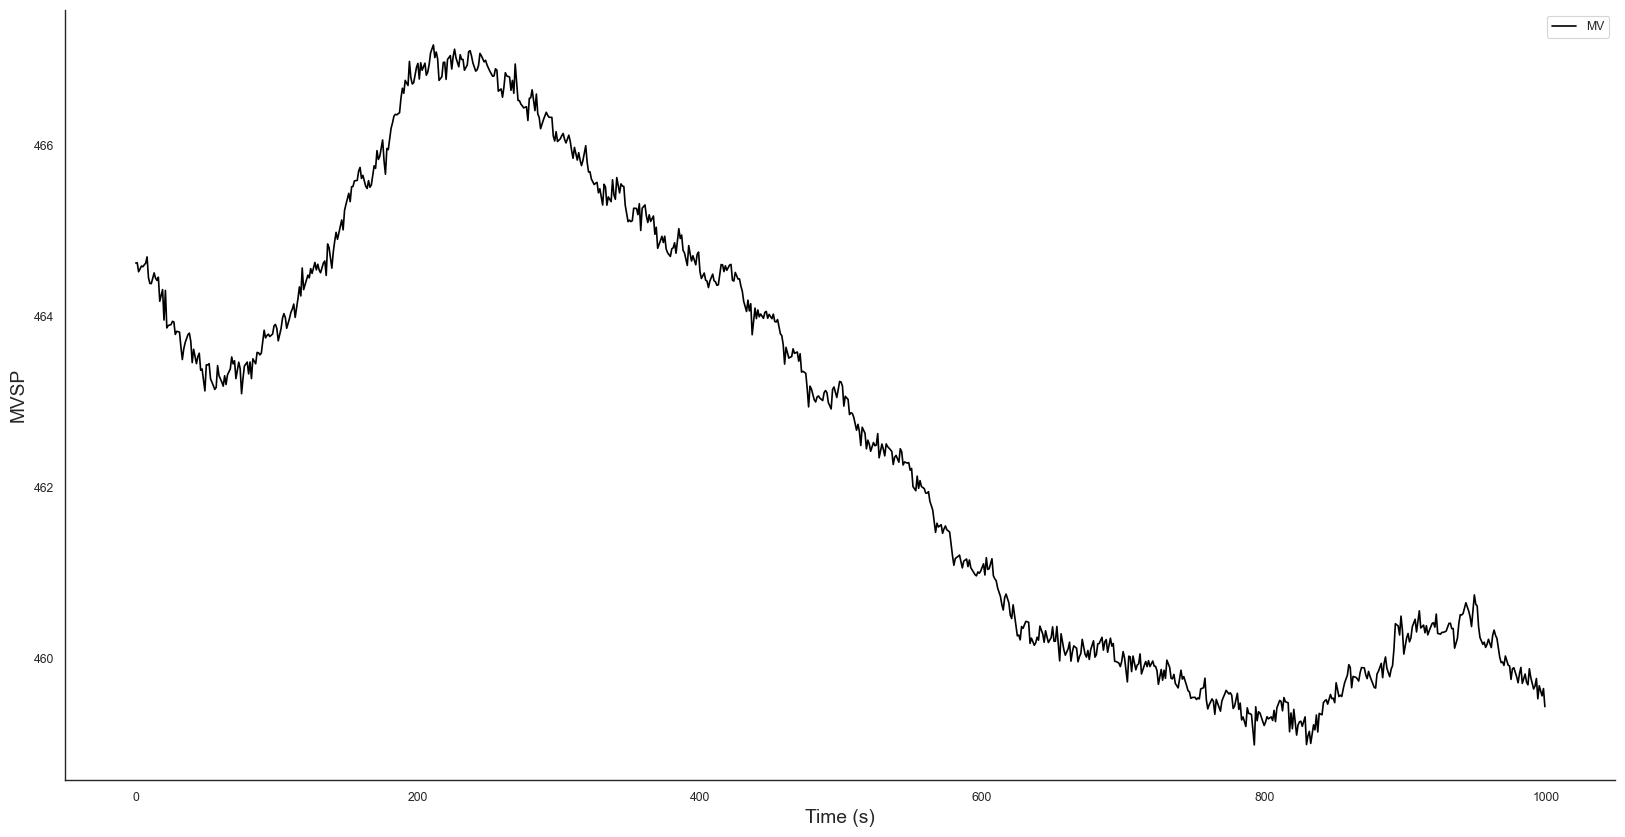

In [5]:
# 우선 데이터에 대한 그래프 출력
df_first = pd.read_csv("planttest_3_2.csv",nrows=num2)
for i in range(num1,num2):
    a = df_first.iloc[i,2]
    df_first.iloc[i,2] = a*10
df_cutted=df_first.iloc[num1:num2,2]
df=pd.DataFrame(df_cutted)
df.head()
sns.set_style("white")
sns.set_context("paper")

ax = df.plot(figsize=(20,10), grid=False, 
                  color ='black')
ax.set_xlabel("Time (s)", fontsize = 'x-large')
ax.set_ylabel("MVSP",fontsize = 'x-large')

sns.despine()
plt.savefig('ts')
plt.show()

# Steady State Detect 하기

In [6]:
# Model의 Steady State의 확률을 Detect하는 과정
model = SSDetector(slope_threashold = 0.005,state_transition_probability = 0.2, number_particles = 100, n_timeless = 10)
# 4개의 변수를 바꾸어 가며 Steady State를 Detect하는데 적합한 모델을 찾을 수 있다. particles의 개수를 늘리면 연산속도가 오래 걸린다.
#slope_threashold: 기울기의 임계값, state_transition_probability: 상태가 변할 확률, number_particles: 연산할 particles의 수, n_timeless: number_particles/100정도로 조정
model.train(df_cutted.values, show_results = True)

C:\Users\BSKIM\Steady State Detector\steady_state.py:234: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = model.sample(self.__n_particles)
C:\Users\BSKIM\Steady State Detector\steady_state.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = model.sample(len(self.__xt_group0))  # sample from f(x) our mixture model


t:  1 
y_hat:  -3.8151561913950083 
Pt:  0.0
t: 999 y_hatis: 460.0856898862538 Pt:  0.9999999999999998802

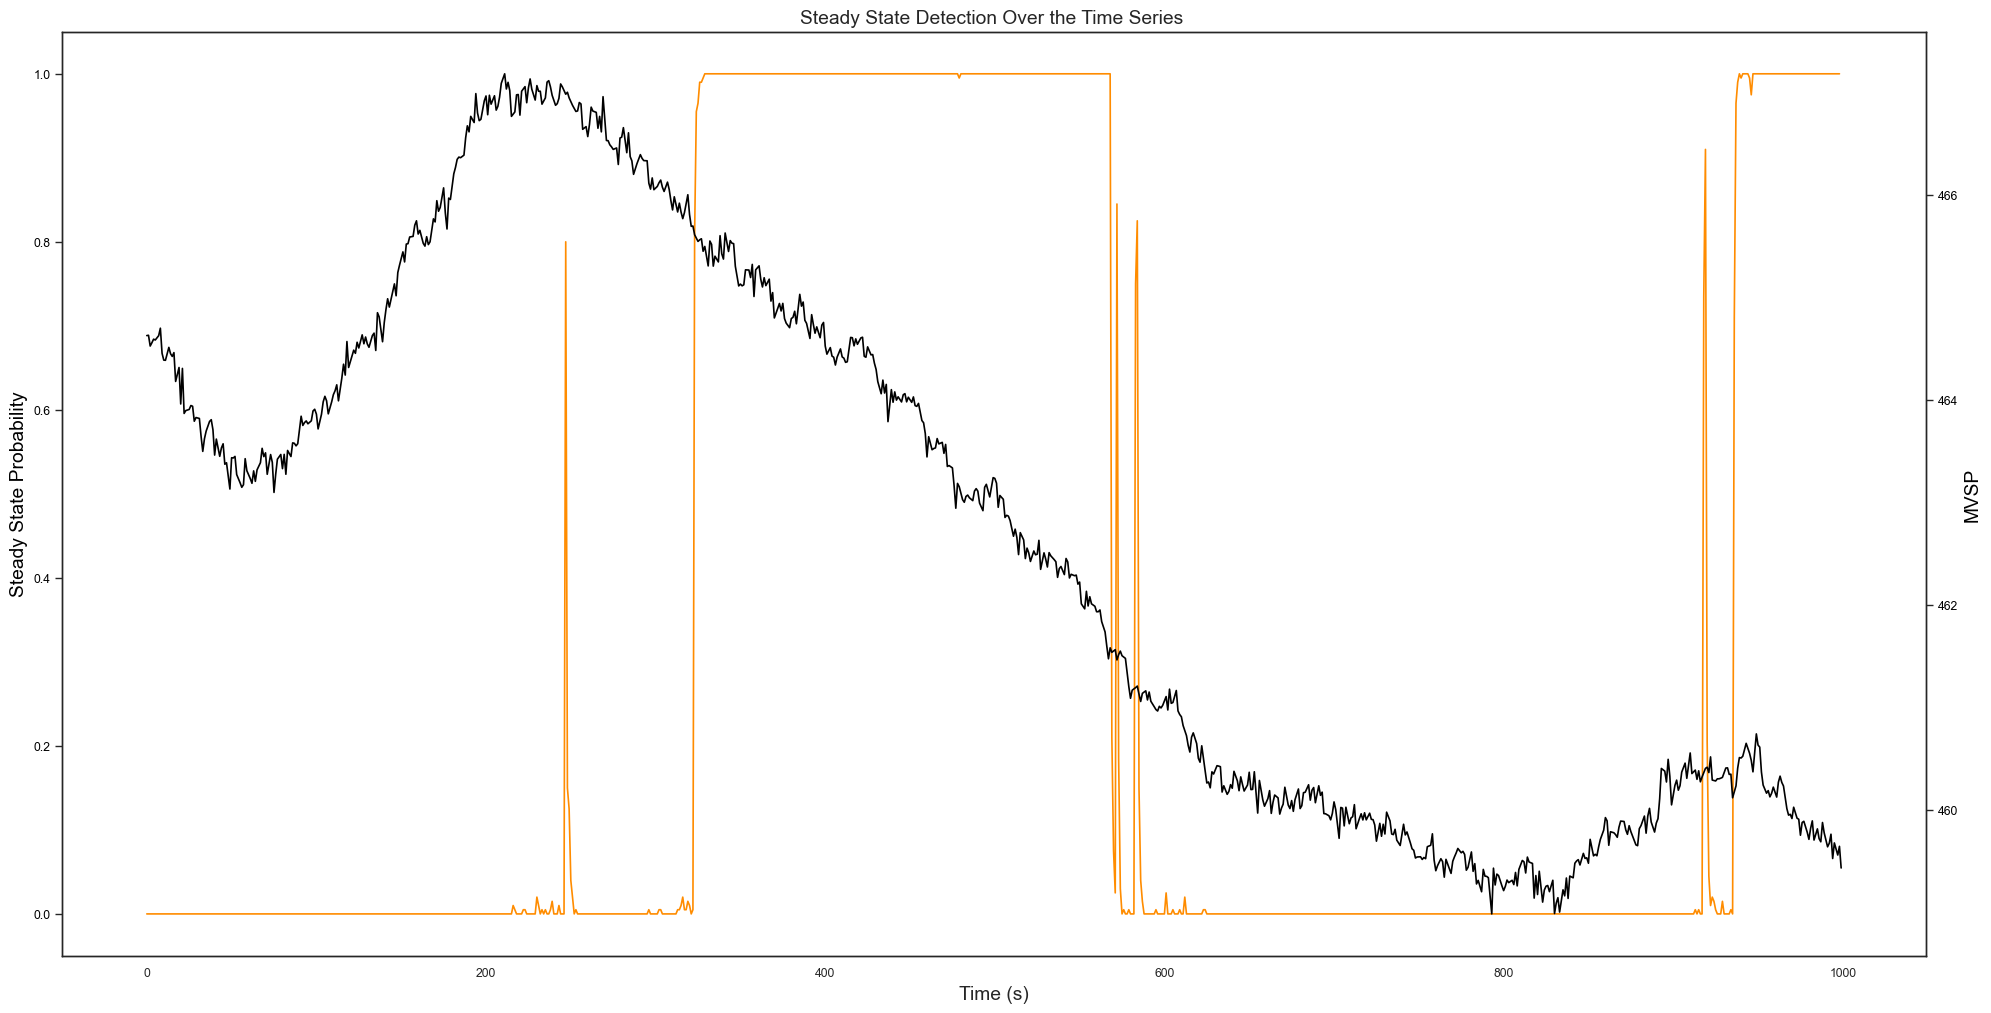

In [7]:
#Steady State할 확률을 분석. 주황색의 그래프가 Steady할 확률이다.
df['y_hat'] = model.y_hat
df['y_hat'] = df.y_hat.shift(-1)
df['p'] = model.p_steady
df['p'] = df.p.shift(-1)
plt.rcParams["figure.figsize"] = (20, 10)
z = np.arange(0,len(df) , 1)  # time scale
fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel("Time (s)", fontsize = 'x-large')
ax1.set_ylabel("Steady State Probability", color='black', fontsize = 'x-large')
ax1.plot(df.index, df.p[0 :len(z)], color='darkorange')  # noqa: E203
ax1.tick_params(axis="y", labelcolor='black')
ax1.grid(False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:blue"
ax2.set_ylabel('MVSP', color='black', fontsize = 'x-large')  # we already handled the x-label with ax1
ax2.plot(df_cutted.index, df_cutted.values, color='black')
ax2.tick_params(axis="y", labelcolor='black')
ax2.grid(False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Steady State Detection Over the Time Series ", fontsize = 'x-large')
plt.savefig('ss_result_2')
plt.show()